In [16]:
import pandas as pd

from src.utils import get_imgs_paths, get_user_info, get_root_path

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
imgs_path = get_imgs_paths()
meta      = get_user_info()

In [18]:
# save image ids from collage to txt file
ids = set([j + '\n' for i in meta['imageID'].str.split(', ').to_list() for j in i])

with open(get_root_path()/'dropbox/files.txt', 'w') as f:
    f.writelines(ids)


In [9]:
# number of images from meta coincide with number of images in folder
assert len(meta['fileName'].unique()) == len(imgs_path)

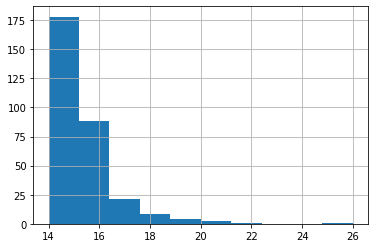

In [10]:
# how many collages each brand has?
meta['brandName'].value_counts().hist();

In [11]:
# how survey length is distributed
dt_start = pd.to_datetime(meta['surveyStart_time'], dayfirst=True)
dt_end = pd.to_datetime(meta['surveyEnd_time'], dayfirst=True)
((dt_end - dt_start).dt.total_seconds() / 60).describe()

count    4743.000000
mean       29.017155
std         8.823973
min         6.000000
25%        25.466667
50%        29.000000
75%        33.000000
max       248.866667
dtype: float64

count    4743.000000
mean        8.127570
std         4.407519
min         0.000000
25%         6.000000
50%         7.000000
75%         9.233333
max        71.816667
dtype: float64


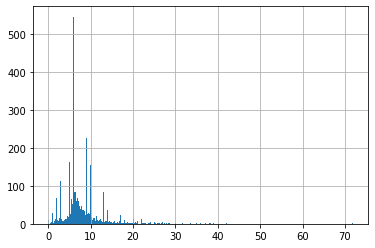

In [12]:
# how collage creation length is distributed
dt_start = pd.to_datetime(meta['collageStart_time'], dayfirst=True)
dt_end = pd.to_datetime(meta['collageEnd_time'], dayfirst=True)

print(((dt_end - dt_start).dt.total_seconds() / 60).describe())
((dt_end - dt_start).dt.total_seconds() / 60).hist(bins=500);


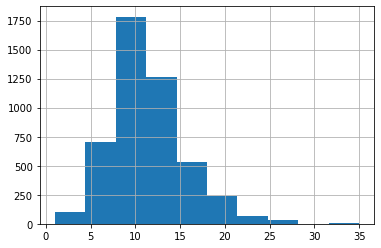

In [13]:
# distribution of images per collage
imgs_per_collage = meta['imageID'].str.split(',').apply(len)
imgs_per_collage.hist();

    feedback           - answer to the sueveyed person?
    status             - approved/Rejected/Pending
    description        - text with details ("It's lively and bright and sparkly.  It's young and exciting.")
    surveyStart_time
    surveyEnd_time
    collageStart_time
    collageEnd_time
    imageID            - ids for image within collage
    imageDimensions    - size of each image in the collage
    imageLayerNumber   - layer num of each image
    imagePos           - 4-dimensional array of (x, y) pairs, containing corners of images
    imageOrientation   - was it rotated?
    searchWords        - which words have been used to search for the image
    

In [14]:
meta['feedback'].sample(1).iloc[0]

'Great job! We would love to keep working with you :)'

In [15]:
meta['description'].sample(1).iloc[0]

'I picked images that evoked a sense of fun.'

In [16]:
meta['imageID'].sample(1).iloc[0]

'61938, 45136, 34274, 61889, 88772, 11675, 48191, 22008, 52553, 946, 75550, 56948, 31872, 5814'

In [17]:
meta['imageDimensions'].sample(1).iloc[0]

'(842.883,549.717), (247.917,165.117), (247.917,165.117), (284.683,165.117), (220.15,165.117), (180.917,131.117), (317.8,225.117), (346.017,238.05), (247.917,165.117), (247.917,165.117), (134.667,107.117), (165.12,165.12)'

In [18]:
meta['imageLayerNumber'].sample(1).iloc[0]

'1, 2, 3, 4, 5, 6, 7, 8, 9, 10'

In [19]:
meta['imagePos'].sample(1).iloc[0]

'[(0.0000,0.0000),(587.5780,0.0000),(587.5780,-293.1090),(0.0000,-293.1090)], [(343.6905,-125.1801),(662.9111,-220.3631),(730.9487,-448.5446),(411.7281,-353.3615)], [(578.4060,-149.9060),(843.0000,-149.9060),(843.0000,-315.0150),(578.4060,-315.0150)], [(260.4327,-289.2837),(653.6973,-377.5437),(717.8316,-663.3103),(324.5670,-575.0503)], [(622.8590,-4.0000),(843.0000,-4.0000),(843.0000,-169.1090),(622.8590,-169.1090)], [(94.1299,-187.7220),(373.6176,-327.8662),(485.2010,-550.3955),(205.7133,-410.2513)], [(0.0000,-384.8910),(260.4220,-384.8910),(260.4220,-550.0000),(0.0000,-550.0000)], [(393.4837,-205.5321),(755.7226,-147.6891),(712.9705,-415.4223),(350.7316,-473.2652)], [(527.0272,-254.8837),(750.5828,-209.8469),(717.9756,-371.7041),(494.4200,-416.7409)]'

In [20]:
meta['imageOrientation'].sample(1).iloc[0]

'0, 0, 0, 0, 0, -0.264033, 0.4182, -0.373982, 0.606821'

In [21]:
meta['searchWords'].sample(1).iloc[0]

'bathroom, sky, sunny day, smiling people, smiling'